# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The columns in the table include: 

>**Patientid:** this is the identification number assigned to each patient. It is a float datatype.

>**Appointment ID:** The is an identification number generated for the paitents appointment for medical checks/treatments. It is an integer

>**Gender:** The patients geneder; male or female

>**Schedule Day:** This is day the appointment was scheduled or setup by the patient. 

>**Appointment Day:** The day for appointed for the medical checkups. 

>**Age:** the age of the patients.

>**Neighbourhood:** this indicates the location of the hospital.

>**Scholarship:** this tells whether the patient was or not enrolled in a welfare programe. 0 is no, 1 is yes.

>**Hypertension, Diabetes, Alcoholism, Handicap:** these are the diagnosed ailments. 1 if present in the patient and 0 if not diagnosed of the ailment.

>**SMS_Recieved:** If the patient recieved SMS to remind them of their appointment. 1 if they recieved and 0 if not.

>**No_Show:** Whether the patient did not show up. No (they did show up), Yes (they did not show up).


### Question(s) for Analysis
>1. What is the mean age of those that showed up for the appointment and those that did not show up?
2. Which gender seem to show up more for their scheduled appointment?
3. What are the important factor(s) to consider in determining if the patient will show up or not.

In [1]:
# to import aall the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The data will be loaded in this section, checked for cleanliness, and then trimmed/cleaned for analysis if need be. 


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') #reads the csv file

In [3]:
df.head() #prints the first 5 rows to get a quick overview of the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail() #Even a more overview...

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape #shows the number of rows and columns in the data set

(110527, 14)

In [6]:
df.nunique() #shows the number of unique elements in each column. 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df['Handcap'].unique() #just curious to know the data in the Handicap column and what they mean.

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
df.info() #Provides a general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
sum(df.duplicated()) #to check for duplicate rows

0

**NOTE**
1. *Obviously there is no missing data and the data-types are adequate*

2. *There might be need to drop the column that won't be used in this analysis. Since there is no proper metadata is provided on the 'Handcap' column, it will be dropped.* **This will be done in the Data Analysis sub-section.**

3. *Also there is no duplicate rows in the dataset*


### Data Cleaning
> The data will be cleaned in this section. From the information on the dataset, it is quite clean and only the Hancap will be dropped. 

In [6]:
#code to drop the Handcap column
df.drop('Handcap', axis=1, inplace=True)

In [7]:
#to confirm if the column has been droped
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No


In [8]:
df.info() #to further confirm the remaining columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the mean age of those that showed up for the appointment and those that did not show up?

In [13]:
#Code to provide a summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**The above ouput [33] shows the summary statistics of some of the columns. For the age, it is was revealed that the mean age or the patient is 37 years.**

In [9]:
#To count the value of those that showed up and those that did not
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

**Obviously, those that showed up for the appointments (88208) were far more than those that missed the appointment (22319)**

**To get the mean value, it is important to apply the groupby function to group the patients based on the no-show column, and then find the mean age based on the groups.**

In [10]:
#This is to group the data based based on the 'No show' values 'Yes' and 'No' and to calculate the mean of the age
df_age = df.groupby('No-show')['Age'].mean() 

In [11]:
print(df_age) #prints the mean age for those that showed up and those that did not show up.

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64


In [12]:
#Function to create bar charts
def barchatFun (dataset, dcolor, mtitle, x, y):
    dataset.plot(kind='bar', title=mtitle, color=dcolor)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)

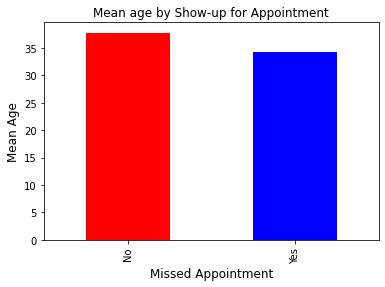

In [13]:
#to plot the chart of the mean age based on the groups
#the chart function is called
barchatFun(df_age, ['Red', 'Blue'], 'Mean age by Show-up for Appointment', 'Missed Appointment', 'Mean Age')

**From the result obtained and chart, the mean age of those that showed up for appointment (37.7) was higher than those that did not show up for the appointment (34.3).**

### Research Question 2: Which gender seem to show up more for their appointment?

**To extract information on the gender that seem to show up more for the appointment, the sex and show-up column will be extracted from the main table.**

In [14]:
#To extract the Gender and Show-up columns
df_sex_su = df[['Gender', 'No-show']]

In [15]:
#To confirm columns
print(df_sex_su)

       Gender No-show
0           F      No
1           M      No
2           F      No
3           F      No
4           F      No
...       ...     ...
110522      F      No
110523      F      No
110524      F      No
110525      F      No
110526      F      No

[110527 rows x 2 columns]


In [ ]:
#Furthermore the rows of those that did not show-up for the appointment will be droped
df_sex_su.drop(df[df['No-show']=='Yes'].index, inplace = True)

In [17]:
#To confirm that it is only those that showed up for the Appointment is in the 'No-show' column
df_sex_su['No-show'].nunique()

1

**To group the data of those that showed up for the appointment based on gender**

In [18]:
#To print the value of gender that showed up for the medical appointment
df_fre = df_sex_su['Gender'].value_counts()
print(df_fre)

F    57246
M    30962
Name: Gender, dtype: int64


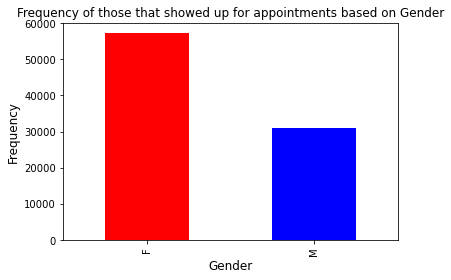

In [19]:
#A bar chart function is called to enhance visualization 
barchatFun(df_fre, ['Red', 'Blue'], 'Frequency of those that showed up for appointments based on Gender', 'Gender', 'Frequency')

**The descriptive result showed that more female patients (57246) showed up for their appointments compared to male patients (30962). However, to draw more insight on this, it important to consider the proportion/percentage. In other words, the total number of male and female based on the original data.**

In [20]:
#To return the gender of those that showed up and did not show up
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [21]:
#To return the gender of those that showed up ONLY
df_fre

F    57246
M    30962
Name: Gender, dtype: int64

In [22]:
#To calculate the percentage (both gender) of those that showed up
female_pro = (57246/71840)*100
male_pro = (30962/38687)*100

In [37]:
#To confirm female percentage(proportion)
print(female_pro)

79.68541202672606


In [38]:
#To confirm male percentage(proportion)
print(male_pro)

80.03205211052808


**Results**

>**This result negates the previous one as further insight revealed that the male patients (80%) seem to slightly perform better at NOT missing appointments compared to their female counterparts (79.7%).**

### Research Question 3: Is the type of Ailment(Hypertensive, Diabetic & Alcoholics), SMS-Received, and Scholarships important factors in determining if the patient will show up or not?

**The descriptive result showed that the lesser the patient ailment, the more it is likely for them NOT to miss medical appointments. In other words patients with lesser ailments seem not to miss medical appointments than those that have more ailments. Hence, the no of ailments do not have a significant relationship with showing up or not showing up for the medical appointment.**

### **1. Type of Ailment**

In [23]:
#To extract the Hipertension, Diabetes, Alcoholism and Show-up columns
df_HypShow = df[['Hipertension', 'No-show']]
df_DiaShow = df[['Diabetes', 'No-show']]
df_AlcShow = df[['Alcoholism', 'No-show']]

In [24]:
#To confirm that of Hypertension
df_HypShow.head(1)

,Hipertension,No-show
0,1,No


In [41]:
#To confirm that of Diabetes
df_DiaShow.head(1)

,Diabetes,No-show
0,0,No


In [42]:
#To confirm that of Alcoholism
df_AlcShow.head(1)

,Alcoholism,No-show
0,0,No


In [ ]:
#Drop the rows of patients with no Hypertension, Diabetes and Alcoholism
df_HypShow.drop(df[df['No-show']=="No"].index, inplace=True)
df_DiaShow.drop(df[df['No-show']=="No"].index, inplace=True)
df_AlcShow.drop(df[df['No-show']=="No"].index, inplace=True)

In [26]:
#Confirmation for that of Hypertension
df_HypShow.head(1)

,Hipertension,No-show
6,0,Yes


In [31]:
#Counts for missed-appointments based on Patients who are diagnosed of Hypertension or Not
df_HypShow1 = df_HypShow.value_counts()
print(df_HypShow1)

Hipertension  No-show
0             Yes        18547
1             Yes         3772
dtype: int64


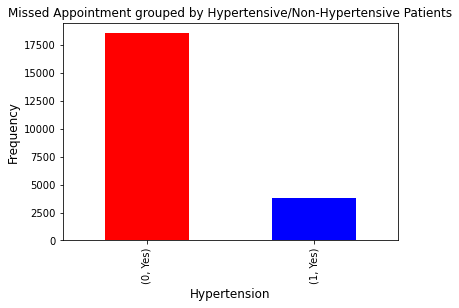

In [29]:
#The barchart function will be called to visualize the frequency of patients who missed appointments based on being Hypertensive/not Hypertensive
barchatFun(df_HypShow1, ['Red', 'Blue'], 'Missed Appointment grouped by Hypertensive/Non-Hypertensive Patients', 'Hypertension', 'Frequency')

In [32]:
#Counts for missed-appointments based on patients who are diagnosed of Diabetes or Not
df_DiaShow1 = df_DiaShow.value_counts()
print(df_DiaShow1)

Diabetes  No-show
0         Yes        20889
1         Yes         1430
dtype: int64


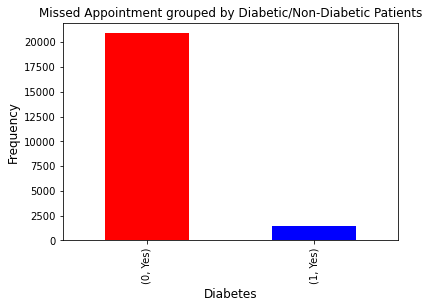

In [33]:
#The barchart function will be called to visualize the frequency of patients who missed appointments based on being Diabetic/not Diabetic (0=Not Diabetic, 1= Diabetic)
barchatFun(df_DiaShow1, ['Red', 'Blue'], 'Missed Appointment grouped by Diabetic/Non-Diabetic Patients', 'Diabetes', 'Frequency')

In [35]:
#Counts for missed-appointments based on patients who are diagnosed of Alcoholism or Not
df_AlcShow1 = df_AlcShow.value_counts()
print(df_AlcShow1)

Alcoholism  No-show
0           Yes        21642
1           Yes          677
dtype: int64


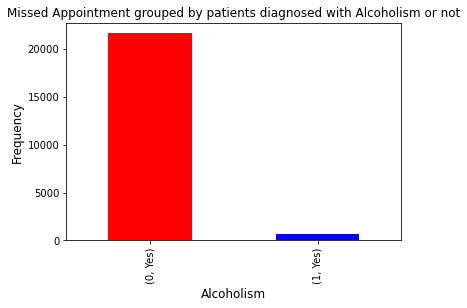

In [36]:
#The barchat function will be called to visualize the frequency of patients who missed appointments based on being an Alocoholic or not  (0=Not diagnosed, 1= diagnoised)
barchatFun(df_AlcShow1, ['Red', 'Blue'], 'Missed Appointment grouped by patients diagnosed with Alcoholism or not', 'Alcoholism', 'Frequency')

**Results**

>**The result showed that most of the patients diagnosed of hypertension, alcoholism or diabetes do not miss medical appointments. In addition, there are more hypertensive patients who missed medical appointments compared to patients with diabetes or alcoholism.**

### 2. SMS Recieved

In [37]:
#To view the original Data
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,No


In [38]:
#Extract the needed dataset, SMS-Recieved and No-show column 
df_SMShow = df[['SMS_received', 'No-show']]
df_SMShow.head(1)

,SMS_received,No-show
0,0,No


In [ ]:
#Only the data for for those who missed the appointment will be used, therefore we will drop for those who did not miss
df_SMShow.drop(df[df['No-show']=="No"].index, inplace=True)

In [40]:
#Value counts (0 =  patients that did not receive SMS reminder, 1 = for those that received SMS reminder )
df_SMShow1 = df_SMShow.value_counts()
print(df_SMShow1)

SMS_received  No-show
0             Yes        12535
1             Yes         9784
dtype: int64


In [42]:
#Function to create pie charts
def piechartFun (dataset, mtitle, x, y):
    dataset.plot(kind='pie', title=mtitle)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)

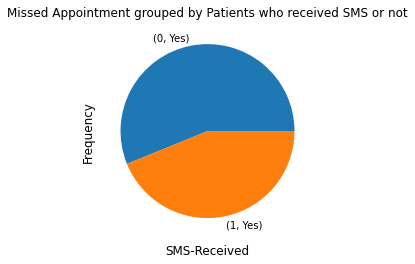

In [43]:
#The piechart function will be called to visualize the degree of patients who missed appointments based on if they received SMS or not (0=Not Received, 1= Received)
piechartFun(df_SMShow1, 'Missed Appointment grouped by Patients who received SMS or not', 'SMS-Received', 'Frequency')

**Result**

>**The result showed that there were more patients who did not receive SMS missed appointments more than those that received SMS. But not much of a difference.**

### 3. Scholarship

In [44]:
#Scholarship and No-Show Data will be extracted
df_SchShow = df[['Scholarship', 'No-show']]
df_SchShow.head(1)

,Scholarship,No-show
0,0,No


In [ ]:
#Only the data for for those who missed the appointment will be used, therefore we will drop for those who did not miss
df_SchShow.drop(df[df['No-show']=="No"].index, inplace=True)

In [47]:
#Value counts (0 =  patients that are not on Scholarship, 1 = for those that are on Scholarship )
df_SchShow1 = df_SchShow.value_counts()
print(df_SchShow1)

Scholarship  No-show
0            Yes        19741
1            Yes         2578
dtype: int64


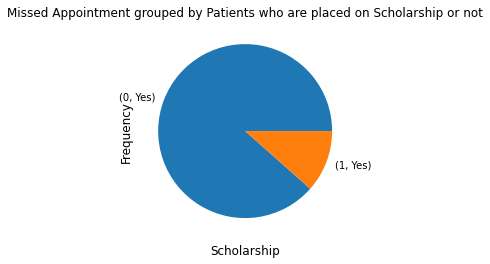

In [48]:
#The piechart function will be called to visualize the frequency of patients who missed appointments becaused they are placed on scholarship or not (0=Not Placed , 1= Placed)
piechartFun(df_SchShow1, 'Missed Appointment grouped by Patients who are placed on Scholarship or not', 'Scholarship', 'Frequency')

**Result**

>**The descriptive result showed that the difference between patients on scholarship and those that are not on scholarship for missed appointments is high. Patients on scholarship are likely not to miss appointments**

<a id='conclusions'></a>
## Conclusions

### Findings

Based on the insight provided in the exploratory analysis, the following was discovered:

i. the mean age of patients that showed up for appointment was higher than those that did not show up. This could be influenced by the frequency of those that did not miss the appointment. However, this analysis did not ascertain that.

ii. More male patients show up for the medical appointments compared to the female patients. However, the proportion difference is almost unnoticeable. 

iii. The ailment types (hypertension, diabetes and alcoholism) are important factors that could possibly influence if patients would show up for appointment. Emphasis could be placed on Alcoholism. 

iv. For patients who missed their schedule, the ones who received SMS are slighly lower compared to those who do receive, and lastly
v. Patients on scholarship tend not to miss their scheduled appointments compared to those who are not on scholarships.

>**Although the noteable relationship does not imply causation, Scholarships, age, and ailment types are important factors that could predict if a patient will show up for their schedule appointment.**

### Limitation
The major limitation to the work is the fact the dataset is majorly categorical data, making it add to perform quick and easy exploration or analysis.